In [7]:
# Importamos las librerias necesarias
import cv2 # Importamos OpenCV para procesamiento de imagenes
import numpy as np # Importamos numpy para manejo de arrays
import matplotlib.pyplot as plt # Importamos matplotlib para visualizacion
from google.colab.patches import cv2_imshow # Importamos funcion para mostrar imagenes en colab

In [8]:
# Cargar una imagen de ejemplo
from urllib.request import urlopen  # Para Abrir URLs

In [9]:
# URL de una imagen de ejemplo
url = 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg'
# Abrimos la URL y leemos los bytes de la imagen
resp = urlopen(url)
# Convertimos los bytes a un array de numpy
image = np.asarray(bytearray(resp.read()), dtype="uint8")
# Decodificamos el array coomo una imagen usando OpenCV
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
# OpenCV carga las imagenes en formato RGB, lo convertimos a RGB para visualizacion correcta
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Convertimos a escala de grises para la deteccion de bordes
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

**1. DETECCION DE BORDES CON CANNY**

In [10]:
# El algoritmo de Canny detecta bordes en una imagen
# Aplicamos un filtro gaussiano para reducir el ruido (Opcional)
blurred = cv2.GaussianBlur(gray_image, (5, 5), 0) # (5, 5) es el tamaño del kernel
# Aplicamos el detector de bordes Canny (umbral minimo, umbral maximo)
edges_canny = cv2.Canny(blurred, 50, 150) # Los umbrales determinan que gradientes se consideran bordes

**2. DETECCIÓN DE BORDES CON SOBEL**

In [11]:
# El operador Sobel calcula los gradientes de la imagen
# Gradiente en dirección X (detecta bordes verticales)
sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)   # dx=1, dy=0 para gradiente horizontal
# Gradienes en dirección Y (detecta bordes horizontales)
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)  # dx=0, dy=1 para gradiente vertical

In [13]:
# Convertimos los gradientes a valor absoluto y luego a uint8
sobelX = np.absolute(sobelx) # Valor absoluto para conseguir magnitud
sobelY = np.absolute(sobely) # Valor absoluto para conseguir magnitud
sobelX = np.uint8(255 * sobelx / np.max(sobelx))  # Normalizamos y comvertimos a uint8
sobely = np.uint8(255 * sobely / np.max(sobely))  # Normalizamos y comvertimos a uint8

# Combinamos los gradientes para obtener la magnitud total
sobel_combined = cv2.bitwise_or(sobelX, sobelY) # Combinamos los bordes Horizontales y Verticales

**3. DETECCIÓN DE BORDES CON LAPLACIANO**

In [14]:
# El operador Laplaciano detecta areas de cambio rapido (bordes)
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F) #Calculamos el laplaciano
laplacian = np.absolute(laplacian) # Valor absoluto para conseguir la magnitud
laplacian = np.uint8(255 * laplacian / np.max(laplacian)) # Normalizamos y convertimos a uint8

**4. DETECCIÓN DE CONTORNOS**

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [225, 138, 128],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[ 82,  21,  55],
        [ 81,  20,  54],
        [ 92,  28,  62],
        ...,
        [175,  71,  82],
        [175,  68,  78],
        [175,  65,  74]],

       [[ 80,  18,  55],
        [ 81,  19,  56],
        [ 96,  32,  66],
        ...,
        [177,  69,  82],
        [181,  71,  80],
        [183,  72,  81]],

       [[ 81,  19,  56],
        [ 83,  21,  58],
        [ 98,  34,  68],
        ...,
        [176,  68,  81],
        [183,  72,  81],
        [188,  74,  84]]], dtype=uint8)
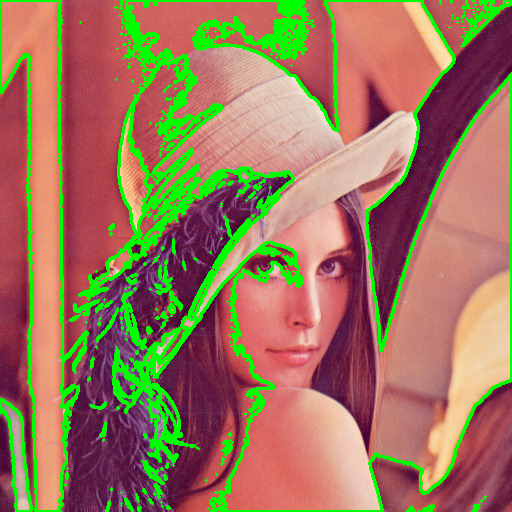

In [15]:
# Primero binarizamos la imagen usando umbral simple
_, thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY) # Aplicamos umbral para binarizar la imagen
# Encontramos los contornos en la imagen binarizada
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Creamos una copia de la imagen original para dibujar los contornos
contour_image = image_rgb.copy()
# Dibujamos todos los contornos encontrados (-1 para dibujar todos)
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2) # Color verde, grosor 2

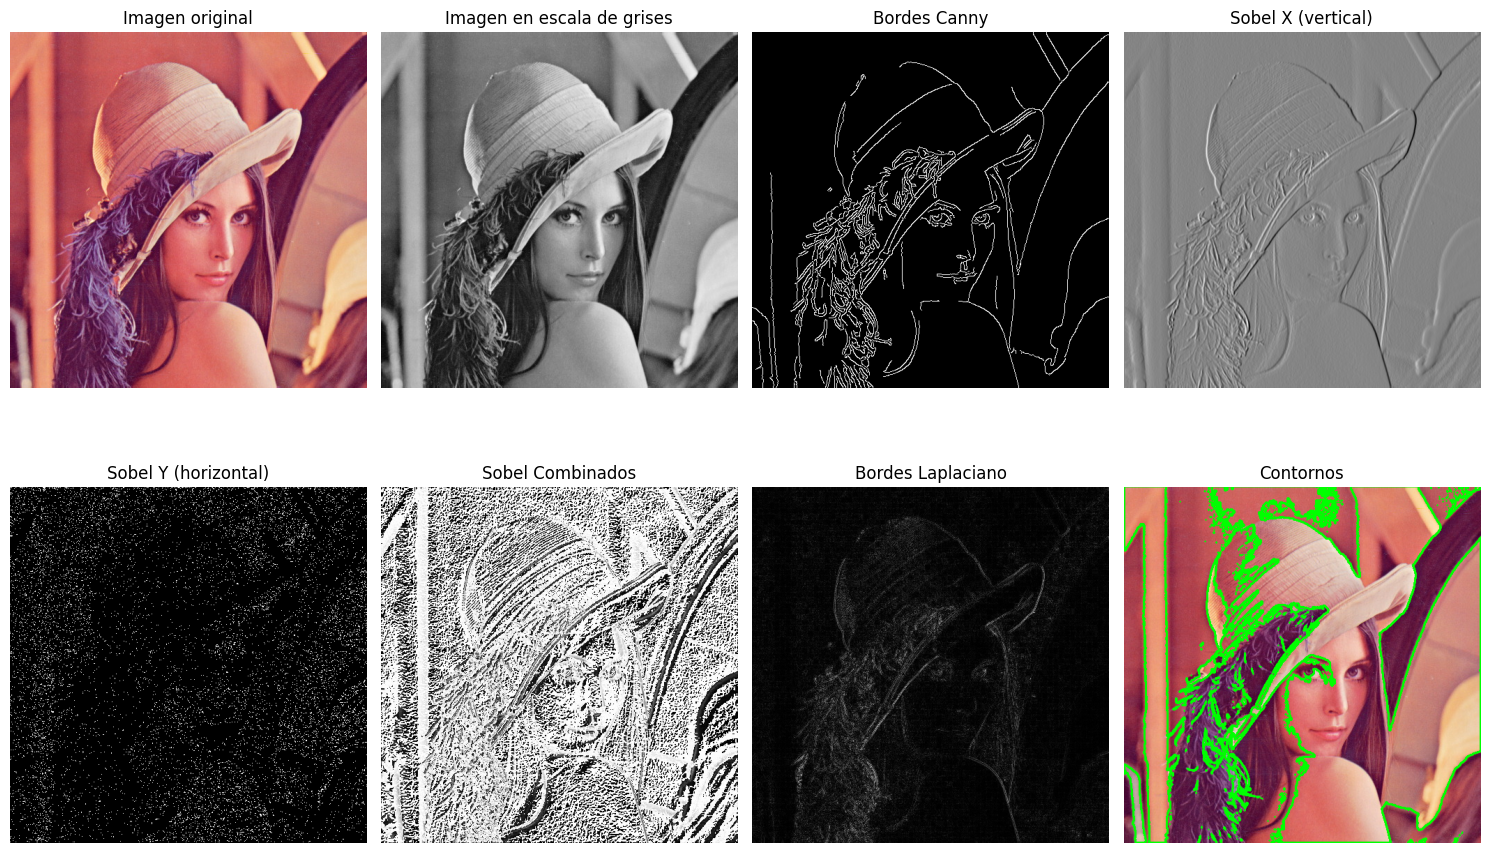

In [16]:
# Visualización de los Resultados
plt.figure(figsize=(15,10)) #Creamos una figura con tamaño especifico

# Imagen original
plt.subplot(2, 4, 1) # Creamos un subplot en la posición 1
plt.title("Imagen original") # Añadimos un titulo
plt.imshow(image_rgb) # Mostramos la imagen original
plt.axis('off') # ocultamos los ejes

# Imagen en escala de grises
plt.subplot(2, 4, 2) # Creamos un subplot en la posición 2
plt.title("Imagen en escala de grises") # Añadimos un titulo
plt.imshow(gray_image, cmap='gray') # Mostramos la imagen en escala de grises
plt.axis('off') # ocultamos los ejes

# Bordes Canny
plt.subplot(2, 4, 3) # Creamos un subplot en la posición 3
plt.title("Bordes Canny") # Añadimos un titulo
plt.imshow(edges_canny, cmap='gray') # Mostramos la imagen
plt.axis('off') # ocultamos los ejes

# Bordes Sobel X
plt.subplot(2, 4, 4) # Creamos un subplot en la posición 4
plt.title("Sobel X (vertical)") # Añadimos un titulo
plt.imshow(sobelx, cmap='gray') # Mostramos los bordes verticales
plt.axis('off') # ocultamos los ejes

# Bordes Sobel y
plt.subplot(2, 4, 5) # Creamos un subplot en la posición 5
plt.title("Sobel Y (horizontal)") # Añadimos un titulo
plt.imshow(sobely, cmap='gray') # Mostramos los bordes horizontales
plt.axis('off') # ocultamos los ejes

# Bordes Sobel Combinados
plt.subplot(2, 4, 6) # Creamos un subplot en la posición 6
plt.title("Sobel Combinados") # Añadimos un titulo
plt.imshow(sobel_combined, cmap='gray') # Mostramos los bordes combinados
plt.axis('off') # ocultamos los ejes

# Bordes Laplaciano
plt.subplot(2, 4, 7) # Creamos un subplot en la posición 7
plt.title("Bordes Laplaciano") #Añadimos un titulo
plt.imshow(laplacian, cmap='gray') # Mostramos los bordes
plt.axis('off') # ocultamos los ejes

# Contornos
plt.subplot(2, 4, 8) # Creamos un subplot en la posicion 8
plt.title("Contornos") # Añadimos un titulo
plt.imshow(contour_image) # Mostramos la imagen con contornos dibujados
plt.axis('off') # ocultamos los ejes

plt.tight_layout() # Ajustamos el layout para no superponer titulos
plt.show() # Mostramos la figura completa

In [17]:
# Información sobre los metodos de detección
print("Metodos de detección de bordes:")
print("1. Canny: Algoritmo multi-etapa que detecta bordes fuertes y debiles. es robusto al ruido")
print("2. Sobel: Calcula gradientes en direcciones X e Y, detectando cambios de intensidad")
print("3. Laplaciano: Detecta areas de cambia rapidamente usando la segunda derivada")
print("4. Contornos: Detecta curvas que unen puntos continuos con el mismo color o intensidad")
print(f"Numero de contornos encontrados: {len(contours)}")

Metodos de detección de bordes:
1. Canny: Algoritmo multi-etapa que detecta bordes fuertes y debiles. es robusto al ruido
2. Sobel: Calcula gradientes en direcciones X e Y, detectando cambios de intensidad
3. Laplaciano: Detecta areas de cambia rapidamente usando la segunda derivada
4. Contornos: Detecta curvas que unen puntos continuos con el mismo color o intensidad
Numero de contornos encontrados: 482
